<a href="https://colab.research.google.com/github/vikasgtm/Analytics_Vidhya/blob/main/AV_Project3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AV Project3

# Portfolio Optimization for Cryptocurrency based on Adj CLose and stock Returns for BTC, ETH, USDT and Tether

## Submitted by: Vikas Gautam
## Mail-id: vikasgtm@gmail.com
## Date: 12/07/2024
##        

# Asset Class: CryptoCurrency
Asset Chosen: Bitcoin, Ethereum, Tether, BNB    

In [ ]:
# Importing scipy
import scipy
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
!pip install pandoc

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.6/127.6 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 5.3 MB/s eta 0:00:00
  Created wheel for pandoc: filename=pandoc-2.3-py3-none-any.whl size=33263 sha256=84c1efd9a6be105a896de53e690d5ecf0836b50417a8095d14fb29091b313d83
  Stored in directory: /root/.cache/pip/wheels/76/27/c2/c26175310aadcb8741b77657a1bb49c50cc7d4cdbf9eee0005
Successfully built pandoc


In [ ]:
!pip install pandas.DataReader


In [ ]:
import pandas_datareader.data as webreader
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import matplotlib.ticker as mtick
from datetime import datetime
import matplotlib.dates as mdates
import numpy as np
import pandoc
#from scipy.stats import kurtosis
from scipy.stats import skew, kurtosis

In [ ]:
!pip install yfinance


## As input for the analysis, I have used Crypto stock price data from Yahoo ## Finance for the period
## starting from Jan 1, 2019 to the time of June 30 7,2024.
## I have chosen Bitcoin (BTC-USD), Ethereum’s Ether (ETH-USD), Tether USD, and ## BNB USD
## to represent the crypto assets for my portfolio.

Bitcoin USD 3 year historic price link:
https://finance.yahoo.com/quote/BTC-USD/history?period1=1675209600&period2=1675987200&interval=1d&filter=history&frequency=1d&includeAdjustedClose=true
    
Ethereum USD 3 year historic price link:
https://finance.yahoo.com/quote/ETH-USD/history?period1=1675209600&period2=1675987200&interval=1d&filter=history&frequency=1d&includeAdjustedClose=true
https://finance.yahoo.com/quote/ETH-USD/history?period1=1675209600&period2=1675987200&interval=1d&filter=history&frequency=1d&includeAdjustedClose=true

Tether USD (USDT) 3 year historic price link:
https://finance.yahoo.com/quote/USDT-USD/history?period1=1675209600&period2=1675987200&interval=1d&filter=history&frequency=1d&includeAdjustedClose=true

BNB USD 3 year historic price link:
https://finance.yahoo.com/quote/BNB-USD/history?period1=1675209600&period2=1675987200&interval=1d&filter=history&frequency=1d&includeAdjustedClose=true


In [ ]:
#################################################################################################################

# 1. BITCOIN

In [ ]:
import yfinance as yfin
BTC = yfin.download('BTC-USD', start='2019-1-1',end='2024-06-30')

[*********************100%%**********************]  1 of 1 completed


In [ ]:
BTC.head(5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-01,3746.713379,3850.913818,3707.231201,3843.520020,3843.520020,4324200990
2019-01-02,3849.216309,3947.981201,3817.409424,3943.409424,3943.409424,5244856836
2019-01-03,3931.048584,3935.685059,3826.222900,3836.741211,3836.741211,4530215219
2019-01-04,3832.040039,3865.934570,3783.853760,3857.717529,3857.717529,4847965467
2019-01-05,3851.973877,3904.903076,3836.900146,3845.194580,3845.194580,5137609824


In [ ]:
BTC.tail(5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-06-25,60266.281250,62258.261719,60239.750000,61804.640625,61804.640625,29201215431
2024-06-26,61789.675781,62434.136719,60695.187500,60811.277344,60811.277344,22506003064
2024-06-27,60811.226562,62293.863281,60585.332031,61604.800781,61604.800781,21231745045
2024-06-28,61612.804688,62126.097656,59985.402344,60320.136719,60320.136719,24952866877
2024-06-29,60319.875000,61097.621094,60300.964844,60887.378906,60887.378906,12652903396


In [ ]:
#Converting daily return data to monthly data, required statistic: mean, median
data_btc_mean=BTC['Adj Close'].resample('m').mean()
data_btc_med=BTC['Adj Close'].resample('m').median()

## PLotting monthly median BTC Adj Close prices

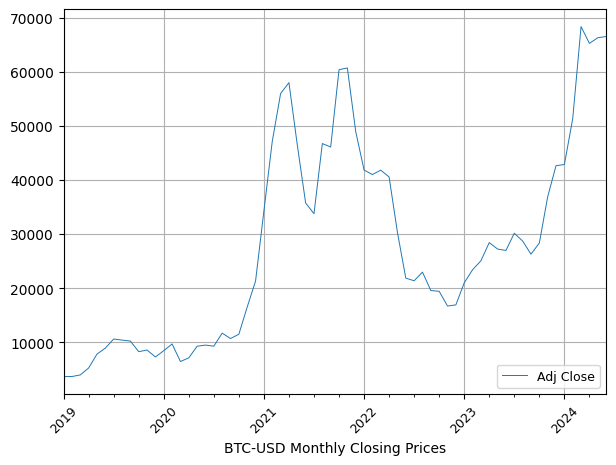

In [ ]:
Fig=plt.subplots(figsize=(7,5))
ax11=data_btc_med.plot(linewidth=.7)
#ax11.xaxis.set_major_formatter(mdates.DateFormatter("%b %Y"))
plt.legend(loc='lower right', ncol=3, fontsize=9)
plt.xlabel('BTC-USD Monthly Closing Prices')
plt.xticks(rotation=45, fontsize=9)
plt.grid(True)
plt.show( )

## high volatility of Bitcoin, particularly during 2021-2022, dropping further ## near 2023 and rising again near 2024
##
## Generating daily Returns based on Adj CLose.pct_change()

In [ ]:
## I created a dataframe with the daily prices. I use the ‘Adj Close’ column as
## it is a price adjusted for splits and dividends distribution. To extract daily returns,
## I calculate the percentage change of the daily prices using the pct_change() method.
datar_btc=pd.DataFrame()
returns_btc=BTC['Adj Close'].pct_change(1)
datar_btc['ticker%']=returns_btc
datar_btc.head(5)

,ticker%
Date,
2019-01-01,NaN
2019-01-02,0.025989
2019-01-03,-0.027050
2019-01-04,0.005467
2019-01-05,-0.003246


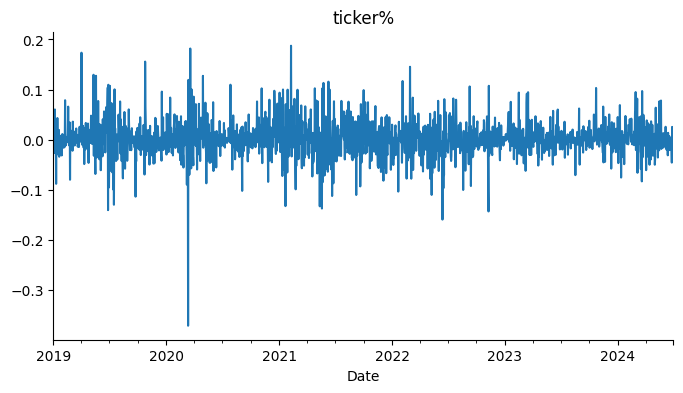

In [ ]:
# @title ticker%

from matplotlib import pyplot as plt
datar_btc['ticker%'].plot(kind='line', figsize=(8, 4), title='ticker%')
plt.gca().spines[['top', 'right']].set_visible(False)

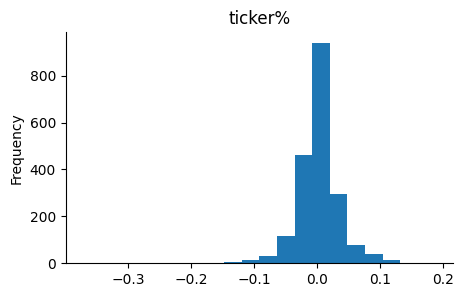

In [ ]:
# @title ticker%
Fig=plt.subplots(figsize=(5,3))
from matplotlib import pyplot as plt
datar_btc['ticker%'].plot(kind='hist', bins=20, title='ticker%')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
#Converting daily return data to monthly data, required statistic: mean, median
datar_meanbtc=datar_btc.resample('m').mean()
datar_medbtc=datar_btc.resample('m').median()
datar_medbtc.head(5)

,ticker%
Date,
2019-01-31,-0.001776
2019-02-28,0.001302
2019-03-31,0.001252
2019-04-30,0.005685
2019-05-31,0.013388


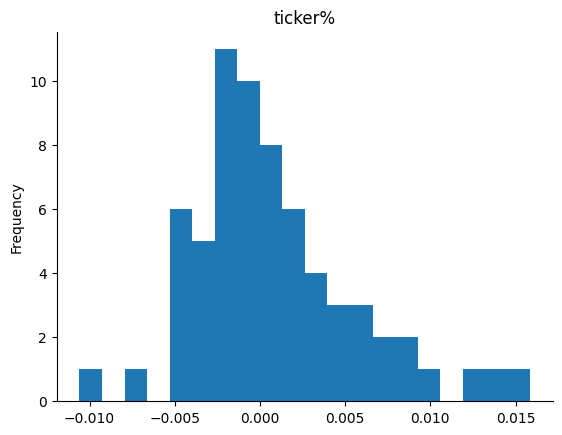

In [ ]:
# @title ticker%

from matplotlib import pyplot as plt
datar_medbtc['ticker%'].plot(kind='hist', bins=20, title='ticker%')
plt.gca().spines[['top', 'right',]].set_visible(False)

## PLotting monthly Returns for BTC

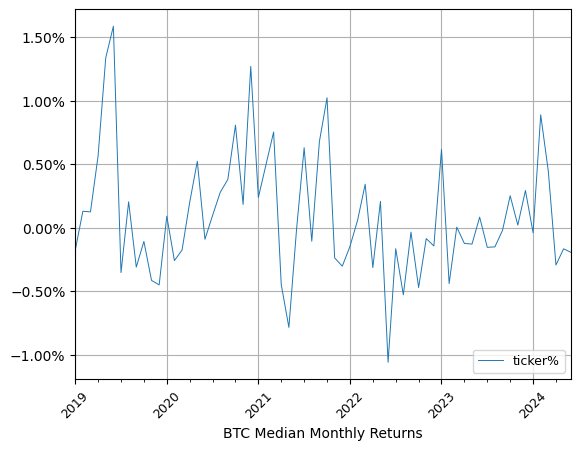

In [ ]:
ax11=datar_medbtc.plot(linewidth=.7)
ax11.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.legend(loc='lower right', ncol=3, fontsize=9)
plt.xlabel('BTC Median Monthly Returns')
plt.xticks(rotation=45, fontsize=9)
plt.grid(True)
plt.show( )

## Plotting the BTC Daily Adj Close time series

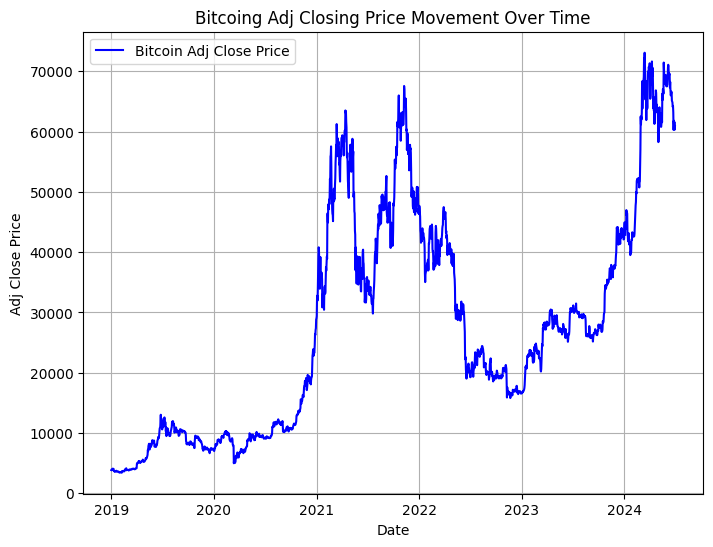

In [ ]:
# Plotting the time series of Closing  Prices
plt.figure(figsize=(8, 6))
plt.plot(BTC.index, BTC['Adj Close'], label='Bitcoin Adj Close Price', color='blue')

plt.title('Bitcoing Adj Closing Price Movement Over Time')
plt.xlabel('Date')
plt.ylabel('Adj Close Price')
plt.legend()
plt.grid(True)
plt.show()

## Dialy returns provide more data points for data analysis, however, annualised returns are usually
## preferred by investors and give a better basis for the comparison of the assets.
## To annualise daily returns of the assets, I calculated mean returns and
## multiply them by 253 (average number of trading days a year).
## Common measure of return volatility, or risk, is the standard deviation. Standard deviation is
## calculated as a square root of the variance and has an advantage of having the same measure unit as the mean.
## Using standard deviation as a measure of risk, we can calculate risk-adjusted performance measures,
## for instance Sharpe ratio. Sharpe Ratio is calculated as annualised returns divided by standard deviation

In [ ]:
#Asset return and volatility (risk) are major factors of the portfolio construction.
#Most investors want to maximise their returns while limiting the risk.
#BTC Arithmeti mean of % daily returns
btc_means=datar_btc.mean()
print ("BTC Average Annualised Returns (arithmetic mean) are:", btc_means*253*100)
#daily_btc_cov=[]
#BTC Co-variance
daily_btc_cov=round(datar_btc.cov(),3)
#print (daily_btc_cov.info())
annual_btc_cov=round(daily_btc_cov*253,3)
print("daily BTC covariance:",daily_btc_cov.iloc[0,0])
print("Annual BTC covarince:",annual_btc_cov.iloc[0,0])

#BTC standard Deviation
btc_stddev=datar_btc.std()*np.sqrt(253)
print('BTC Standard Deviation are: ', btc_stddev)

#BTC Variance
print ("BTC Variance:", (btc_stddev*btc_stddev))

#BTCSharpe Ratio
btc_sr=btc_means*253/btc_stddev
print ('BTC Sharpe Ratio: ',btc_sr)

BTC Average Annualised Returns (arithmetic mean) are: ticker%    50.086614
dtype: float64
daily BTC covariance: 0.001
Annual BTC covarince: 0.253
BTC Standard Deviation are:  ticker%    0.547724
dtype: float64
BTC Variance: ticker%    0.300001
dtype: float64
BTC Sharpe Ratio:  ticker%    0.91445
dtype: float64


## Appending lists with code,returns ans annual covarianceL this we will use to ## find
## respective weights of the assets for the optimal portfolio in terms of min ## volatilty,
## highest sharpe ratio, high expected retruns

In [ ]:

summary_code=[]
summary_ann_returns=[]
summary_ann_cov=[]

summary_code.append("BTC-USD")
summary_ann_returns.append(btc_means*253)
summary_ann_cov.append(annual_btc_cov.iloc[0,0])


In [ ]:
print (summary_code)
print ("BTC Annual Returns: ",summary_ann_returns)
print ("BTC Annual Covariance: ",summary_ann_cov)

['BTC-USD']
BTC Annual Returns:  [ticker%    0.500866
dtype: float64]
BTC Annual Covariance:  [0.253]


In [ ]:
######################################################################################################

# 2. ETHEREUM

## We will follow similar steps for other crypto currency as we did for BTC
## and generate daily monthly and annual stats like returns, covaiance,
## variance, standard deviation and sharpe ratio..

In [ ]:
#Ethereum
ETH = yfin.download('ETH-USD', start='2019-1-1',end='2024-06-30')

[*********************100%%**********************]  1 of 1 completed


In [ ]:
ETH.head(5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-01,133.418152,141.397507,132.650711,140.819412,140.819412,2258709868
2019-01-02,141.519516,156.929138,140.650955,155.047684,155.047684,3328240369
2019-01-03,155.196045,155.863052,147.198364,149.135010,149.135010,2676164880
2019-01-04,148.912888,156.878983,147.907104,154.581940,154.581940,3126192535
2019-01-05,154.337418,160.824890,154.337418,155.638596,155.638596,3338211928


In [ ]:
ETH.tail(5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-06-25,3350.555664,3422.213379,3335.556885,3395.029053,3395.029053,13235546063
2024-06-26,3394.373291,3421.509521,3328.390625,3369.477295,3369.477295,11694054195
2024-06-27,3368.886230,3470.923096,3362.264648,3444.800537,3444.800537,11771834016
2024-06-28,3445.498779,3482.957520,3363.437500,3373.635986,3373.635986,12861158844
2024-06-29,3373.689941,3401.730225,3369.552734,3372.967773,3372.967773,6584792001


## Converting daily return data to monthly data: mean, median

In [ ]:
#Converting daily return data to monthly data, required statistic: mean, median
data_eth_mean=ETH['Adj Close'].resample('m').mean()
data_eth_med=ETH['Adj Close'].resample('m').median()
data_eth_med.tail(5)

Date
2024-02-29    2786.672607
2024-03-31    3561.293945
2024-04-30    3217.670288
2024-05-31    3103.541992
2024-06-30    3516.075684
Freq: M, Name: Adj Close, dtype: float64

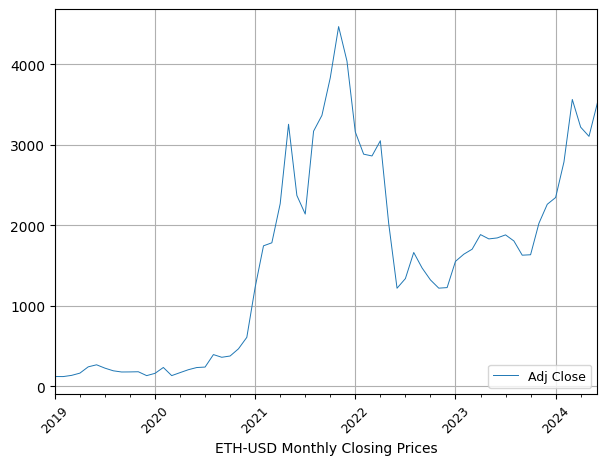

In [ ]:
Fig= plt.subplots(figsize=(7,5))
ax11=data_eth_med.plot(linewidth=.7)

#ax11.xaxis.set_major_formatter(mdates.DateFormatter("%b %Y"))
plt.legend(loc='lower right', ncol=3, fontsize=9)
plt.xlabel('ETH-USD Monthly Closing Prices')
plt.xticks(rotation=45, fontsize=9)
plt.grid("True")
plt.show( )

## high volatility of Ethereum, particularly during 2021-2022, dropping further near 2023
## and rise near 2024

## I created a dataframe with the daily prices. I use the ‘Adj Close’ column as
## it is a price adjusted for splits and dividends distribution. To extract
## daily returns, I calculate the percentage change of the daily prices using ## the pct_change() method.

## Daily Returns for ETH

In [ ]:
#I created a dataframe with the daily prices. I use the ‘Adj Close’ column as
#it is a price adjusted for splits and dividends distribution. To extract daily returns,
#I calculate the percentage change of the daily prices using the pct_change() method.
datar_eth=pd.DataFrame()
returns_eth=ETH['Adj Close'].pct_change(1)
datar_eth['ticker%']=returns_eth
datar_eth.head(5)

,ticker%
Date,
2019-01-01,NaN
2019-01-02,0.101039
2019-01-03,-0.038135
2019-01-04,0.036523
2019-01-05,0.006836


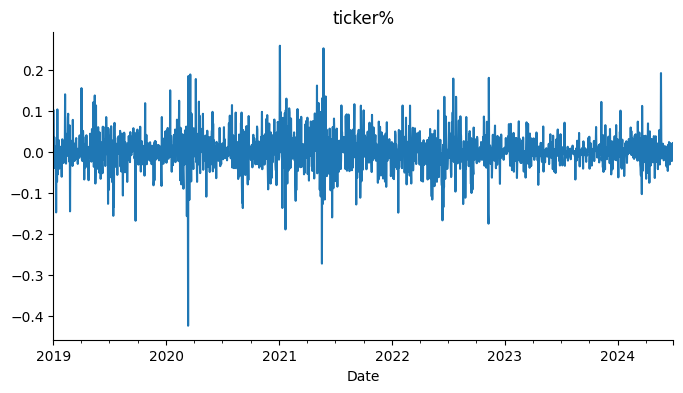

In [ ]:
# @title ticker%

from matplotlib import pyplot as plt
datar_eth['ticker%'].plot(kind='line', figsize=(8, 4), title='ticker%')
plt.gca().spines[['top', 'right']].set_visible(False)

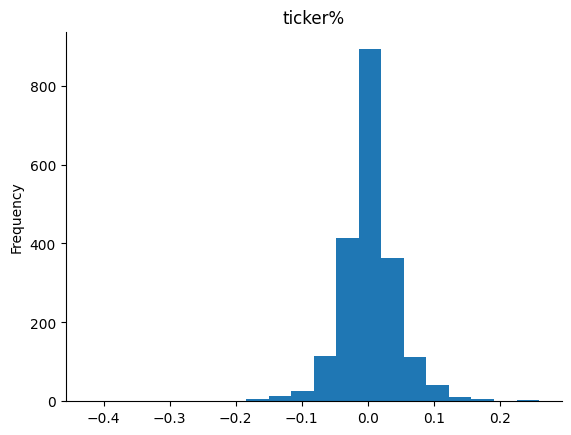

In [ ]:
# @title ticker%

from matplotlib import pyplot as plt
datar_eth['ticker%'].plot(kind='hist', bins=20, title='ticker%')
plt.gca().spines[['top', 'right',]].set_visible(False)

## Converting daily return data to monthly data, required statistic: mean, median

In [ ]:
#Converting daily return data to monthly data, required statistic: mean, median
datar_meaneth=datar_eth.resample('m').mean()
datar_medeth=datar_eth.resample('m').median()
datar_medeth.head(5)

,ticker%
Date,
2019-01-31,-0.008610
2019-02-28,0.003808
2019-03-31,-0.002840
2019-04-30,-0.000180
2019-05-31,0.008111


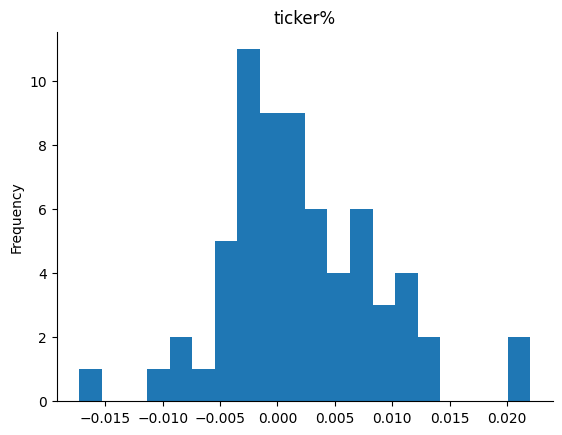

In [ ]:
# @title ticker%

from matplotlib import pyplot as plt
datar_medeth['ticker%'].plot(kind='hist', bins=20, title='ticker%')
plt.gca().spines[['top', 'right',]].set_visible(False)

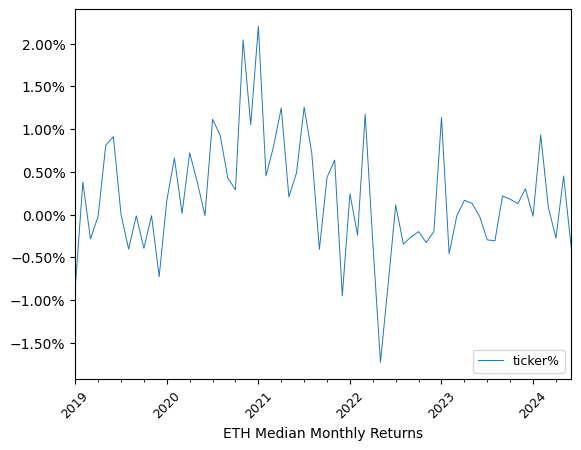

In [ ]:
ax11=datar_medeth.plot(linewidth=.7)
ax11.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.legend(loc='lower right', ncol=3, fontsize=9)
plt.xlabel('ETH Median Monthly Returns')
plt.xticks(rotation=45, fontsize=9)
plt.show( )

## Dialy returns provide more data points for data analysis, however, ## ## annualised returns are usually
## preferred by investors and give a better basis for the comparison of the ## assets.
## To annualise daily returns of the assets, I calculate mean returns and
## multiply them by 253 (average number of trading days a year).
## Common measure of return volatility, or risk, is the standard deviation.
## Standard deviation is calculated as a square root of the variance and has an
## advantage of having the same measure unit as the mean.
## Using standard deviation as a measure of risk, we can calculate ## risk-adjusted performance measures,
## for instance Sharpe ratio. Sharpe Ratio is calculated as annualised returns divided by standard deviation

In [ ]:
#ETH Arithmeti mean of % daily returns
eth_means=datar_eth.mean()
print ("ETH USD Annualised Returns (arithmetic mean) are:", eth_means*253*100)

#ETH Co-variance
daily_eth_cov=round(datar_eth.cov(),3)
annual_eth_cov=round(daily_eth_cov*253,3)
print("daily ETH covariance:",daily_eth_cov.iloc[0,0])
print("Annual ETH covarince:",annual_eth_cov.iloc[0,0])

#ETH standard Deviation
eth_stddev=datar_eth.std()*np.sqrt(253)
print('ETH Standard Deviation are: ', eth_stddev)

#ETH Variance
print ("ETH Variance:", (eth_stddev*eth_stddev))

#ETH Sharpe Ratio
eth_sr=eth_means*253/eth_stddev
print ('ETH Sharpe Ratio: ',btc_sr)

ETH USD Annualised Returns (arithmetic mean) are: ticker%    64.653624
dtype: float64
daily ETH covariance: 0.002
Annual ETH covarince: 0.506
ETH Standard Deviation are:  ticker%    0.694447
dtype: float64
ETH Variance: ticker%    0.482257
dtype: float64
ETH Sharpe Ratio:  ticker%    0.91445
dtype: float64


## Appending lists with code,returns ans annual covarianceL this we will use to ## find
## respective weights of the assets for the optimal portfolio in terms of min ## volatilty,
## highest sharpe ratio, high expected retruns

In [ ]:

summary_code.append("ETH-USD")
summary_ann_returns.append(eth_means*253)

summary_ann_cov=np.append(summary_ann_cov,annual_eth_cov.iloc[0,0])


In [ ]:
print (summary_code)
print (summary_ann_returns)
print (summary_ann_cov)

['BTC-USD', 'ETH-USD']
[ticker%    0.500866
dtype: float64, ticker%    0.646536
dtype: float64]
[0.253 0.506]


In [ ]:
##########################################################################################################

# 3. Tether USD (USDT)

In [ ]:
USDT = yfin.download('USDT-USD', start='2019-1-1',end='2023-2-7')

[*********************100%%**********************]  1 of 1 completed


In [ ]:
USDT.tail(5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-02-02,1.000088,1.000328,1.000083,1.000140,1.000140,43575657052
2023-02-03,1.000142,1.000276,1.000078,1.000131,1.000131,36792033814
2023-02-04,1.000122,1.000162,1.000054,1.000100,1.000100,24493083193
2023-02-05,1.000093,1.000268,1.000089,1.000198,1.000198,30313569702
2023-02-06,1.000209,1.000274,1.000067,1.000102,1.000102,32088027094


In [ ]:
#Converting daily return data to monthly data, required statistic: mean, median
data_usdt_mean=USDT['Adj Close'].resample('m').mean()
data_usdt_med=USDT['Adj Close'].resample('m').median()
data_usdt_med.tail(5)


Date
2022-10-31    1.000085
2022-11-30    0.999411
2022-12-31    1.000057
2023-01-31    1.000099
2023-02-28    1.000117
Freq: M, Name: Adj Close, dtype: float64

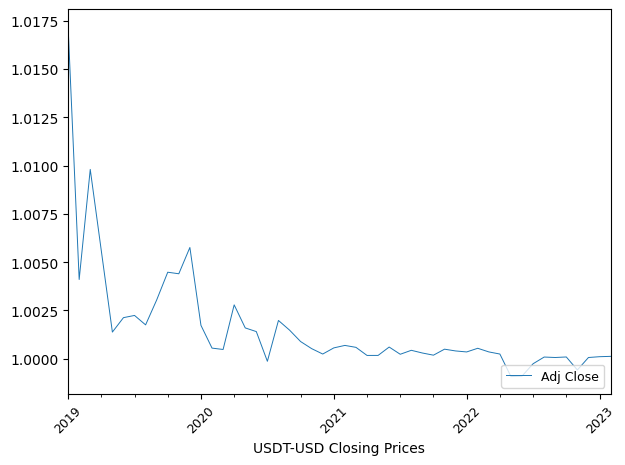

In [ ]:
Fig=plt.subplots(figsize=(7,5))
ax11=data_usdt_med.plot(linewidth=.7)
#ax11.xaxis.set_major_formatter(mdates.DateFormatter("%b %Y"))
plt.legend(loc='lower right', ncol=3, fontsize=9)
plt.xlabel('USDT-USD Closing Prices')
plt.xticks(rotation=45, fontsize=9)
plt.show( )

## I created a dataframe with the daily prices. I use the ‘Adj Close’ column as
## it is a price adjusted for splits and dividends distribution. To extract ## daily returns,
## I calculate the percentage change of the daily prices using the pct_change() method.

In [ ]:

datar_usdt=pd.DataFrame()
returns_usdt=USDT['Adj Close'].pct_change(1)
datar_usdt['ticker%']=returns_usdt
datar_usdt.head(5)

,ticker%
Date,
2019-01-01,NaN
2019-01-02,0.005575
2019-01-03,-0.004433
2019-01-04,-0.002230
2019-01-05,0.001267


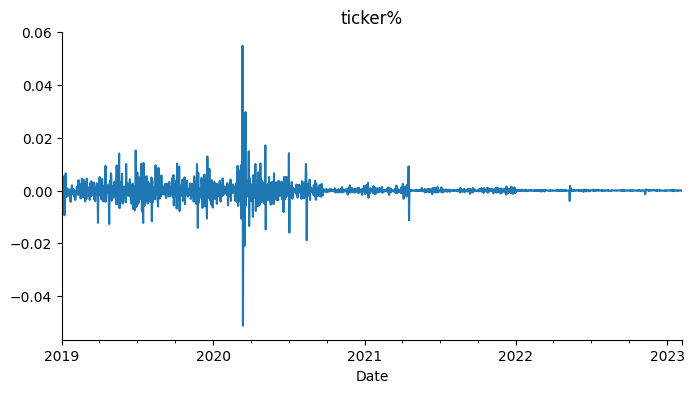

In [ ]:
# @title ticker%

from matplotlib import pyplot as plt
datar_usdt['ticker%'].plot(kind='line', figsize=(8, 4), title='ticker%')
plt.gca().spines[['top', 'right']].set_visible(False)

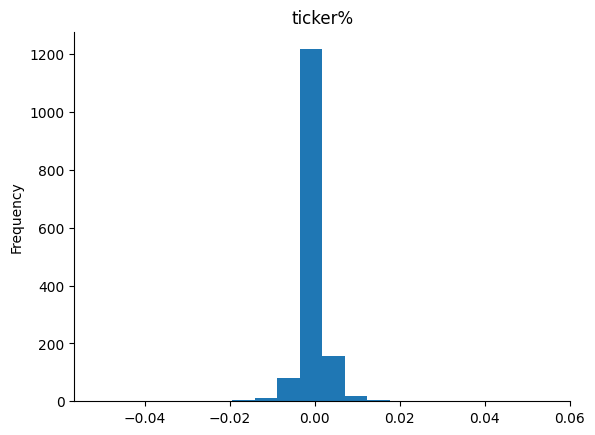

In [ ]:
# @title ticker%

from matplotlib import pyplot as plt
datar_usdt['ticker%'].plot(kind='hist', bins=20, title='ticker%')
plt.gca().spines[['top', 'right',]].set_visible(False)

## Converting daily return data to monthly data, required statistic: mean, median

In [ ]:
#Converting daily return data to monthly data, required statistic: mean, median
datar_meanusdt=datar_usdt.resample('m').mean()
datar_medusdt=datar_usdt.resample('m').median()
datar_medusdt.head(5)

,ticker%
Date,
2019-01-31,-0.000502
2019-02-28,-0.000094
2019-03-31,-0.000042
2019-04-30,-0.000508
2019-05-31,-0.000343


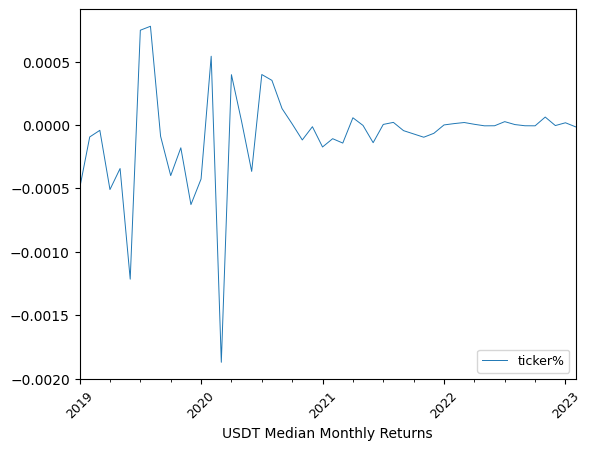

In [ ]:
# Fig,ax=plt.subplots(figsize=(7,5))
ax11=datar_medusdt.plot(linewidth=.7)
#ax11.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.legend(loc='lower right', ncol=3, fontsize=9)
plt.xlabel('USDT Median Monthly Returns')
plt.xticks(rotation=45, fontsize=9)
plt.show( )

## Dialy returns provide more data points for data analysis, however, ## annualised returns are usually
## preferred by investors and give a better basis for the comparison of the assets.
## To annualise daily returns of the assets, I calculate mean returns and
## multiply them by 253 (average number of trading days a year).
## Common measure of return volatility, or risk, is the standard deviation. Standard deviation is
##calculated as a square root of the variance and has an advantage of having the same measure unit as the mean.
## Using standard deviation as a measure of risk, we can calculate risk-adjusted performance measures,
## for instance Sharpe ratio. Sharpe Ratio is calculated as annualised returns divided by standard deviation

In [ ]:
#USDT Arithmeti mean of % daily returns
usdt_means=datar_usdt.mean()
print ("USDT USD Annualised Returns (arithmetic mean) are:", usdt_means*253*100)

#USDT Co-variance
daily_usdt_cov=round(datar_usdt.cov(),5)
annual_usdt_cov=round(daily_usdt_cov*253,5)
print("daily USDT covariance:",daily_usdt_cov.iloc[0,0])
print("Annual USDT covarince:",annual_usdt_cov.iloc[0,0])

# USDT standard Deviation
usdt_stddev=datar_usdt.std()*np.sqrt(253)
print('USDT Standard Deviation are: ', usdt_stddev)

#USDT Variance
print ("USDT Variance:", (usdt_stddev*usdt_stddev))

#USDT Sharpe Ratio
usdt_sr=usdt_means*253/usdt_stddev
print ('USDT Sharpe Ratio: ',usdt_sr)

USDT USD Annualised Returns (arithmetic mean) are: ticker%   -0.158103
dtype: float64
daily USDT covariance: 1e-05
Annual USDT covarince: 0.00253
USDT Standard Deviation are:  ticker%    0.054319
dtype: float64
USDT Variance: ticker%    0.002951
dtype: float64
USDT Sharpe Ratio:  ticker%   -0.029106
dtype: float64


In [ ]:
summary_code.append("USDT-USD")
summary_ann_returns.append(usdt_means*253)



In [ ]:
summary_ann_cov=np.append(summary_ann_cov,annual_usdt_cov.iloc[0,0])

In [ ]:
print (summary_code)
print (summary_ann_returns)
print (summary_ann_cov)

['BTC-USD', 'ETH-USD', 'USDT-USD']
[ticker%    0.500866
dtype: float64, ticker%    0.646536
dtype: float64, ticker%   -0.001581
dtype: float64]
[0.253   0.506   0.00253]


In [ ]:
#############################################################################################################

# 4. BNB USD

In [ ]:
BNB = yfin.download('BNB-USD', start='2019-1-1',end='2023-2-7')

[*********************100%%**********************]  1 of 1 completed


In [ ]:
BNB.tail(5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-02-02,317.346191,333.495544,316.711060,323.349792,323.349792,909077028
2023-02-03,323.291351,334.545166,318.903229,332.268677,332.268677,861598551
2023-02-04,332.249695,333.870941,327.741425,330.617096,330.617096,440935963
2023-02-05,330.558258,337.320526,324.879486,327.869354,327.869354,662969265
2023-02-06,327.861847,330.957428,321.946136,324.627167,324.627167,521894604


In [ ]:
#Converting daily return data to monthly data, required statistic: mean, median
data_bnb_mean=BNB['Adj Close'].resample('m').mean()
data_bnb_med=BNB['Adj Close'].resample('m').median()
data_bnb_med.tail(5)

Date
2022-10-31    276.469574
2022-11-30    296.672806
2022-12-31    251.744537
2023-01-31    298.999237
2023-02-28    326.248260
Freq: M, Name: Adj Close, dtype: float64

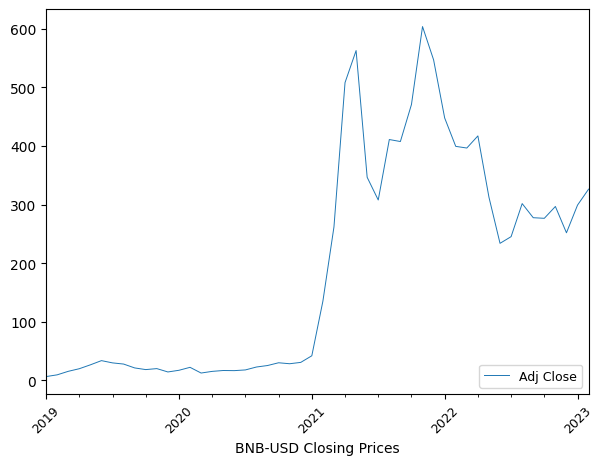

In [ ]:
Fig=plt.subplots(figsize=(7,5))
ax11=data_bnb_med.plot(linewidth=.7)
#ax11.xaxis.set_major_formatter(mdates.DateFormatter("%b %Y"))
plt.legend(loc='lower right', ncol=3, fontsize=9)
plt.xlabel('BNB-USD Closing Prices')
plt.xticks(rotation=45, fontsize=9)
plt.show( )

## I created a dataframe with the daily prices. I use the ‘Adj Close’ column as
## it is a price adjusted for splits and dividends distribution. To extract daily returns,
## I calculate the percentage change of the daily prices using the pct_change() method.

In [ ]:
#
datar_bnb=pd.DataFrame()
returns_bnb=BNB['Adj Close'].pct_change(1)
datar_bnb['ticker%']=returns_bnb
datar_bnb.head(5)

,ticker%
Date,
2019-01-01,NaN
2019-01-02,0.018656
2019-01-03,-0.046065
2019-01-04,0.027374
2019-01-05,0.000067


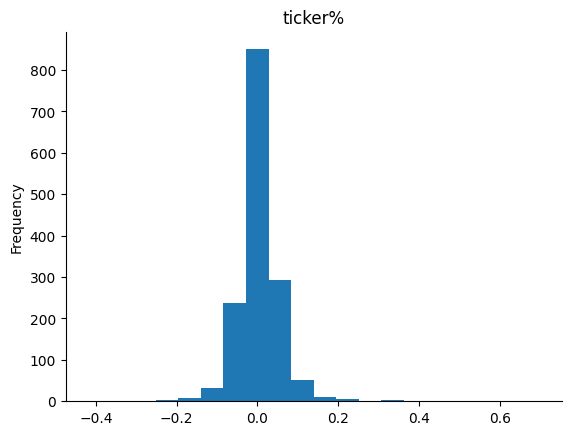

In [ ]:
# @title ticker%

from matplotlib import pyplot as plt
datar_bnb['ticker%'].plot(kind='hist', bins=20, title='ticker%')
plt.gca().spines[['top', 'right',]].set_visible(False)

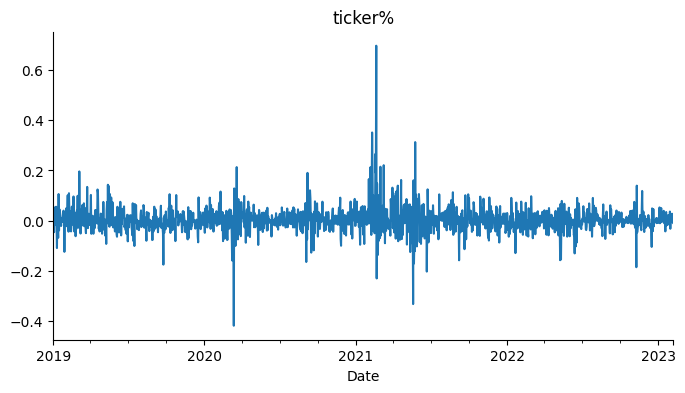

In [ ]:
# @title ticker%

from matplotlib import pyplot as plt
datar_bnb['ticker%'].plot(kind='line', figsize=(8, 4), title='ticker%')
plt.gca().spines[['top', 'right']].set_visible(False)

## Converting daily return data to monthly data, required statistic: mean, median

In [ ]:
#Converting daily return data to monthly data, required statistic: mean, median
datar_meanbnb=datar_bnb.resample('m').mean()
datar_medbnb=datar_bnb.resample('m').median()
datar_medbnb.head(5)

,ticker%
Date,
2019-01-31,0.005950
2019-02-28,0.034277
2019-03-31,0.001378
2019-04-30,0.013270
2019-05-31,-0.003653


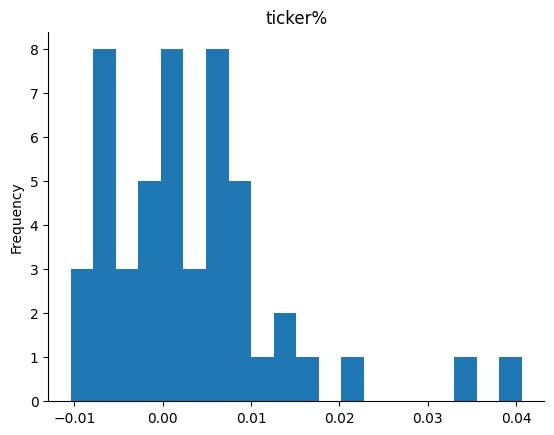

In [ ]:
# @title ticker%

from matplotlib import pyplot as plt
datar_medbnb['ticker%'].plot(kind='hist', bins=20, title='ticker%')
plt.gca().spines[['top', 'right',]].set_visible(False)

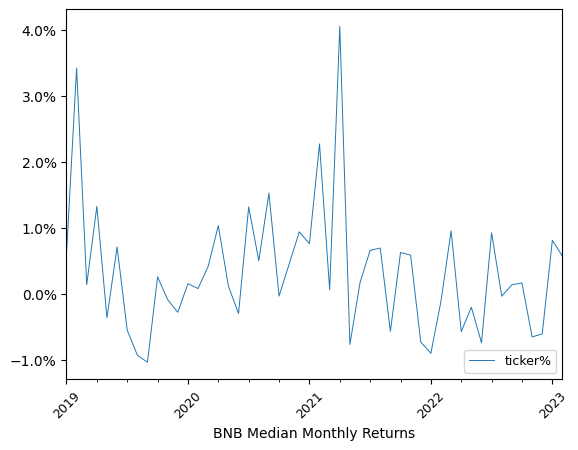

In [ ]:
ax11=datar_medbnb.plot(linewidth=.7)
ax11.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.legend(loc='lower right', ncol=3, fontsize=9)
plt.xlabel('BNB Median Monthly Returns')
plt.xticks(rotation=45, fontsize=9)
plt.show( )

## Dialy returns provide more data points for data analysis, however, annualised returns are usually
## preferred by investors and give a better basis for the comparison of the assets.
## To annualise daily returns of the assets, I calculate mean returns and
## multiply them by 253 (average number of trading days a year).
## Common measure of return volatility, or risk, is the standard deviation. Standard deviation is
##calculated as a square root of the variance and has an advantage of having the same measure unit as the mean.
## Using standard deviation as a measure of risk, we can calculate risk-adjusted performance measures,
## for instance Sharpe ratio. Sharpe Ratio is calculated as annualised returns divided by standard deviation

In [ ]:
#BNB Arithmeti mean of % daily returns
bnb_means=datar_bnb.mean()
print ("BNB USD Annualised Returns (arithmetic mean) are:", bnb_means*253*100)

#BNB Co-variance
daily_bnb_cov=round(datar_bnb.cov(),5)
annual_bnb_cov=round(daily_bnb_cov*253,5)
print("daily BNB covariance:",daily_bnb_cov.iloc[0,0])
print("Annual BNB covarince:",annual_bnb_cov.iloc[0,0])

# BNB standard Deviation
bnb_stddev=datar_bnb.std()*np.sqrt(253)
print('BNB Standard Deviation are: ', bnb_stddev)

#BNB Variance
print ("BNB Variance:", (bnb_stddev*bnb_stddev))

#BNB Sharpe Ratio
bnb_sr=bnb_means*253/bnb_stddev
print ('BNB Sharpe Ratio: ',bnb_sr)

BNB USD Annualised Returns (arithmetic mean) are: ticker%    102.40598
dtype: float64
daily BNB covariance: 0.00284
Annual BNB covarince: 0.71852
BNB Standard Deviation are:  ticker%    0.848192
dtype: float64
BNB Variance: ticker%    0.71943
dtype: float64
BNB Sharpe Ratio:  ticker%    1.207344
dtype: float64


In [ ]:
summary_code.append("BNB-USD")
#we multiply mean return wuth 253 to get annual returns
summary_ann_returns.append(bnb_means*253)
summary_ann_cov=np.append(summary_ann_cov,annual_bnb_cov.iloc[0,0])



In [ ]:
print (summary_code)
print (summary_ann_returns)
print (summary_ann_cov)

['BTC-USD', 'ETH-USD', 'USDT-USD', 'BNB-USD']
[ticker%    0.500866
dtype: float64, ticker%    0.646536
dtype: float64, ticker%   -0.001581
dtype: float64, ticker%    1.02406
dtype: float64]
[0.253   0.506   0.00253 0.71852]


In [ ]:
#################################################################################################

# Merging the Asset DataFrames

## Converting daily return data to yearly data, required statistic: mean, median

In [ ]:
#Converting daily return data to yearly data, required statistic: mean, median
#datar_ymeanbtc=datar_btc.resample('Y').mean()
#datar_ymedbtc=datar_btc.resample('Y').median()

#datar_ymeaneth=datar_eth.resample('Y').mean()
#datar_ymedeth=datar_eth.resample('Y').median()

#datar_ymeanusdt=datar_usdt.resample('Y').mean()
#datar_ymedusdt=datar_usdt.resample('Y').median()

#datar_ymeanbnb=datar_bnb.resample('Y').mean()
#datar_ymedbnb=datar_bnb.resample('Y').median()


# Merging daily and and mean monthly returns of cryptostocks into new datasets

In [ ]:
#Concatenating yearly retruns
#ydataset1=pd.concat([datar_ymeanbtc,datar_ymeaneth,datar_ymeanusdt,datar_ymeanbnb],axis=1,join='inner')


In [ ]:
#setting column names
#ydataset1.columns=['BTC-USD','ETH-USD','USDT-USD','BNB-USD']
#ydataset1.head()

In [ ]:
#Concatenating daily retruns
ddataset2=pd.concat([datar_btc,datar_eth,datar_usdt,datar_bnb],axis=1,join='inner')
ddataset2.columns=['BTC-USD','ETH-USD','USDT-USD','BNB-USD']
ddataset2.head(5)

,BTC-USD,ETH-USD,USDT-USD,BNB-USD
Date,,,,
2019-01-01,NaN,NaN,NaN,NaN
2019-01-02,0.025989,0.101039,0.005575,0.018656
2019-01-03,-0.027050,-0.038135,-0.004433,-0.046065
2019-01-04,0.005467,0.036523,-0.002230,0.027374
2019-01-05,-0.003246,0.006836,0.001267,0.000067


# Correlation Matrix

In [ ]:
#Correlations are the foundation of portfolio diversification. In short,
#the most diversified portfolio is the portfolio of uncorrelated assets
corrmatrix=ddataset2.corr()
corrmatrix

,BTC-USD,ETH-USD,USDT-USD,BNB-USD
BTC-USD,1.000000,0.820447,-0.035211,0.650885
ETH-USD,0.820447,1.000000,-0.066763,0.680432
USDT-USD,-0.035211,-0.066763,1.000000,-0.062556
BNB-USD,0.650885,0.680432,-0.062556,1.000000


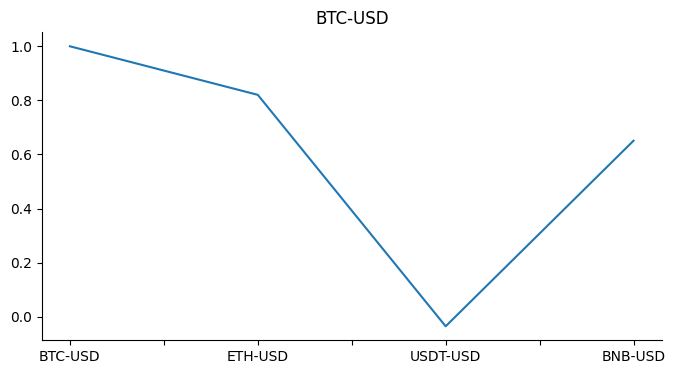

In [ ]:
# @title BTC-USD

from matplotlib import pyplot as plt
corrmatrix['BTC-USD'].plot(kind='line', figsize=(8, 4), title='BTC-USD')
plt.gca().spines[['top', 'right']].set_visible(False)

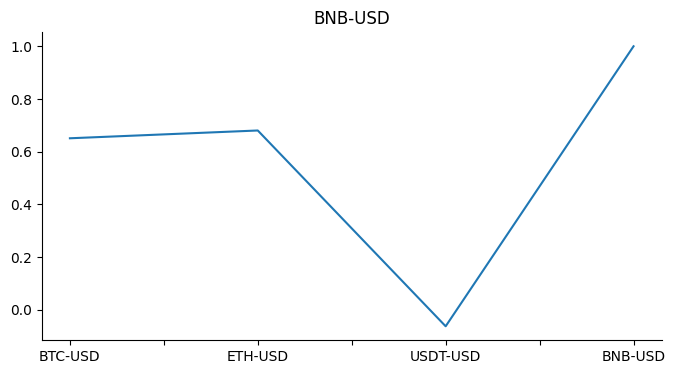

In [ ]:
# @title BNB-USD

from matplotlib import pyplot as plt
corrmatrix['BNB-USD'].plot(kind='line', figsize=(8, 4), title='BNB-USD')
plt.gca().spines[['top', 'right']].set_visible(False)

# Variance and Covariance MAtrix

In [ ]:
#Variance aqnd Covariance MAtrix
#The diagonal elements of the variance_matrix represent the variance of each asset,
#while the off-diagonal terms represent the covariance between the two assets,
#eg: (row=1,column=2) element represents the covariance between BTC and ETH.
#we multiple the covariance matrix with 253 as there are 253 trading days in a year
variance_matrix=ddataset2.cov()*253
variance_matrix

,BTC-USD,ETH-USD,USDT-USD,BNB-USD
BTC-USD,0.347885,0.368685,-0.001128,0.325624
ETH-USD,0.368685,0.580462,-0.002763,0.439710
USDT-USD,-0.001128,-0.002763,0.002951,-0.002882
BNB-USD,0.325624,0.439710,-0.002882,0.719430


<Axes: >

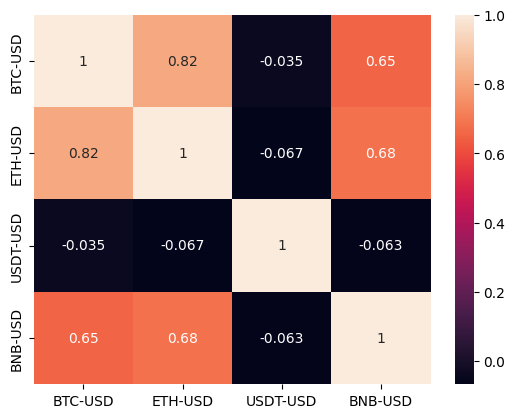

In [ ]:

#plot the heatmap
sns.heatmap(corrmatrix,annot=True)

# Optimal Portfolio

## The task for us is to optimize the weights. So that we can maximize our return or
## minimize our risk or maximise the Sharpe Ratio
## we will compute around 300 probable combinations of weights

In [ ]:

no_ofcryptoassets=len(ddataset2.columns)
no_ofcryptoportfolios=500
p_returns, p_volatility, p_sharperatio, p_coinweights =([] for i in range(4))

for b_crypto_portfolio in range(no_ofcryptoportfolios):
    weights = np.random.random(no_ofcryptoassets)
    weights /= np.sum(weights)

    returns = np.dot(weights,summary_ann_returns)*100

    volatility = np.sqrt(np.dot(np.dot(weights.T,variance_matrix),weights))*100
    #print (volatility)
    p_sharperatio.append(returns/volatility)
    p_returns.append(returns[0])
    p_volatility.append(volatility)
    p_coinweights.append(weights)

    # a dictionary for Returns and Risk values of each portfolio
    portfolio = {'volatility': p_volatility,
             'sharpe_ratio': p_sharperatio, 'returns': p_returns}


In [ ]:
for counter,symbol in enumerate(summary_code):
    portfolio[symbol+'-%'] = [Weight[counter] for Weight in p_coinweights]


In [ ]:
df_portfolio1 = pd.DataFrame(portfolio)

# Portfolio weights combination with Max Returns

In [ ]:
df_portfolio2 = df_portfolio1.sort_values(by=['returns'],ascending=False)
df_portfolio2.head()

,volatility,sharpe_ratio,returns,BTC-USD-%,ETH-USD-%,USDT-USD-%,BNB-USD-%
235,74.859859,[1.1919280509458658],89.227566,0.087712,0.224021,0.001288,0.686980
493,71.498125,[1.2038814942551899],86.075270,0.233106,0.035495,0.027249,0.704150
135,71.772704,[1.1927544885355637],85.607215,0.004430,0.242210,0.072374,0.680986
79,74.126469,[1.1494747183310816],85.206502,0.008731,0.442686,0.000295,0.548288
57,69.639695,[1.2060969353618518],83.992223,0.219837,0.015951,0.061521,0.702691


# Portfolio with Min Volatility (Standard Deviation)

In [ ]:
#Portfoilio1 with MIN VOLATiLITY
#idxmin gives us the min value for volatiltiy or standard deviation
min_vol_port1=df_portfolio1.iloc[df_portfolio1['volatility'].idxmin()]
min_vol_port1

volatility                 13.698465
sharpe_ratio    [1.1399756953841556]
returns                    15.615917
BTC-USD-%                   0.065721
ETH-USD-%                   0.009117
USDT-USD-%                  0.809322
BNB-USD-%                    0.11584
Name: 245, dtype: object

In [ ]:
#SHARPE RAIO2: Adjusting Risk free Rate (Rf-0.05)
rf=0.05
df_portfolio1['sharperatio2']=((df_portfolio1['returns']-rf)/df_portfolio1['volatility'])
print (df_portfolio1.head(5))


   volatility          sharpe_ratio    returns  BTC-USD-%  ETH-USD-%  \
0   37.750555    [1.20422229844335]  45.460060   0.060777   0.057848   
1   30.346534  [1.1059775853332796]  33.562586   0.063449   0.200835   
2   57.071134  [1.0810572782333174]  61.697165   0.212469   0.368394   
3   45.249103  [1.0639199510696884]  48.141423   0.514882   0.030609   
4   47.713678  [1.0167646319908448]  48.513580   0.446765   0.189281   

   USDT-USD-%  BNB-USD-%  sharperatio2  
0    0.502927   0.378448      1.202898  
1    0.564932   0.170783      1.104330  
2    0.152927   0.266210      1.080181  
3    0.255164   0.199345      1.062815  
4    0.227878   0.136076      1.015717  


# Portfolio combination(s) with Min Volatilty

In [ ]:
df_portfolio4 = df_portfolio1.sort_values(by=['volatility'],ascending=True)
df_portfolio4.head()

,volatility,sharpe_ratio,returns,BTC-USD-%,ETH-USD-%,USDT-USD-%,BNB-USD-%,sharperatio2
245,13.698465,[1.1399756953841556],15.615917,0.065721,0.009117,0.809322,0.115840,1.136326
90,18.997554,[1.132973086955671],21.523718,0.035759,0.097072,0.734630,0.132539,1.130341
116,21.126639,[1.1213993847294543],23.691400,0.137664,0.055871,0.676678,0.129787,1.119033
265,22.826200,[1.0669965645907475],24.355477,0.253830,0.010912,0.627493,0.107764,1.064806
370,23.069772,[0.994105614781702],22.933790,0.298519,0.019794,0.615290,0.066398,0.991938


# Portfolio with Max Sharpe Ratio

In [ ]:
#Finding the optimal portfolio: highest Sharpe Raio
#risk factor
optimal_risky_port2=df_portfolio1.iloc[df_portfolio1['sharperatio2'].idxmax()]

print (optimal_risky_port2)

volatility                 57.931764
sharpe_ratio    [1.2088078634308919]
returns                    70.028372
BTC-USD-%                   0.002144
ETH-USD-%                   0.020424
USDT-USD-%                   0.30707
BNB-USD-%                   0.670362
sharperatio2                1.207945
Name: 124, dtype: object


# Portfolio with max Sharpe Ratio
## This looks like combination(s) for medium return and medium volatitly

In [ ]:
df_portfolio5 = df_portfolio1.sort_values(by=['sharperatio2'],ascending=False)
df_portfolio5.head()

,volatility,sharpe_ratio,returns,BTC-USD-%,ETH-USD-%,USDT-USD-%,BNB-USD-%,sharperatio2
124,57.931764,[1.2088078634308919],70.028372,0.002144,0.020424,0.307070,0.670362,1.207945
115,47.931227,[1.2082054434406142],57.910769,0.090069,0.039802,0.373232,0.496897,1.207162
295,40.952649,[1.2076053999121037],49.454640,0.026077,0.054093,0.483062,0.436767,1.206384
477,53.734302,[1.206356272443603],64.822712,0.049623,0.084041,0.310189,0.556147,1.205426
57,69.639695,[1.2060969353618518],83.992223,0.219837,0.015951,0.061521,0.702691,1.205379


# Portfolio with highest Retrun

In [ ]:
#Portfolio with Highest Return
optimal_return_port3=df_portfolio1.iloc[df_portfolio1['returns'].idxmax()]

print (optimal_return_port3)

volatility                 74.859859
sharpe_ratio    [1.1919280509458658]
returns                    89.227566
BTC-USD-%                   0.087712
ETH-USD-%                   0.224021
USDT-USD-%                  0.001288
BNB-USD-%                    0.68698
sharperatio2                 1.19126
Name: 235, dtype: object


# Charts and Graphs

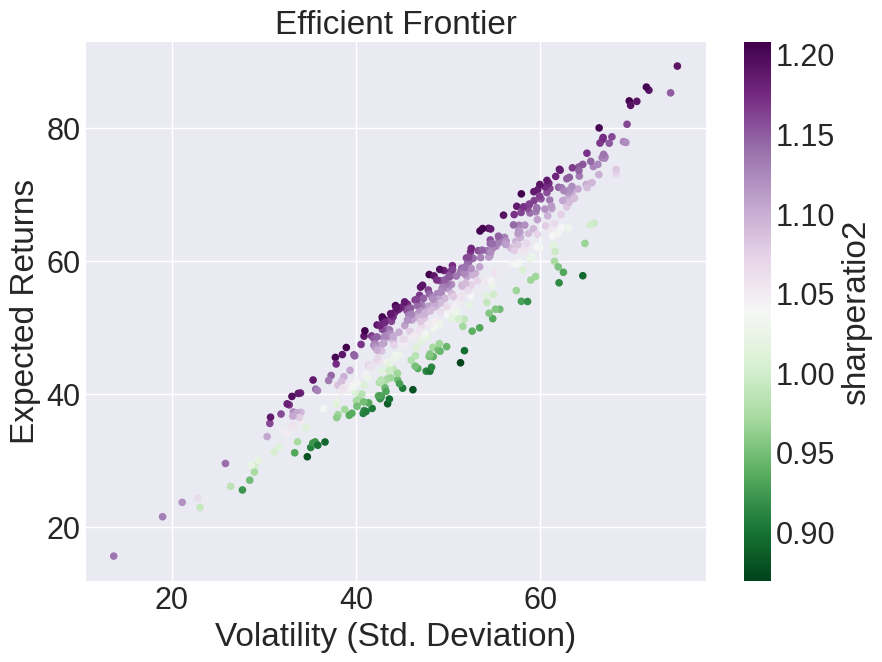

In [233]:
#plotting scatter plots
order_cols = ['returns', 'volatility', 'sharpe_ratio','sharperatio2']+[symbol+'-%' for symbol in summary_code]
df3 = df_portfolio1[order_cols]
# Fig, ax = #plt.subplots(figsize=(5,5))
sharpe_portfolio = df3.loc[df3['sharperatio2'] == df3['sharperatio2'].max()]
min_variance_port = df3.loc[df3['volatility'] == df3['volatility'].min()]
max_returns_port = df3.loc[df3['returns'] == df3['returns'].max()]

plt.style.use('seaborn-dark')
df3.plot.scatter(x='volatility', y='returns', c='sharperatio2',
                cmap='PRGn_r', figsize=(10, 7), grid=True)

plt.xlabel('Volatility (Std. Deviation)')
plt.ylabel('Expected Returns')
plt.title('Efficient Frontier')
plt.show()

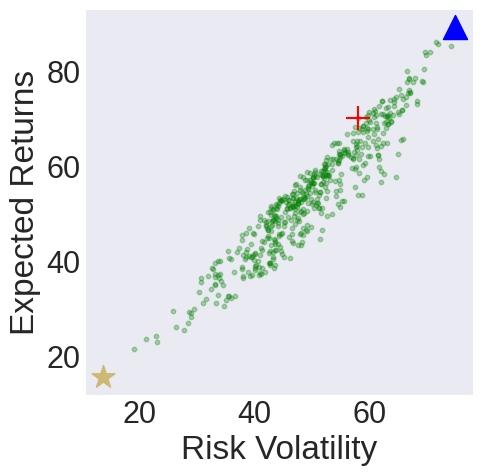

In [229]:
#To find out where will the highest Sharpe Ratio point lies on the above curve ?
#plotting optmial portfolio and minimum volatiltiy
Fig=plt.subplots(figsize=(5,5))
plt.scatter(x=df3['volatility'],y=df3['returns'],marker='o',s=10,
           alpha=0.3, color='green')
#MiN VoLATiLity- makred by star(*)
plt.scatter(x=min_vol_port1[0],y=min_vol_port1[2],color='y',marker='*',s=300)
#Optimal Risky protfolio based on sharpe ratio, marked by -plus(+)
plt.scatter(optimal_risky_port2[0],optimal_risky_port2[2],color='red',marker='+',s=300)
#Optimal Retrun based on retrun: marked by cap(^)
plt.scatter(optimal_return_port3[0],optimal_return_port3[2],color='blue',marker='^',s=300)
plt.xlabel('Risk Volatility')
plt.ylabel('Expected Returns')
plt.show()

In [ ]:
#portfolio with max sharep raio
sharpe_portfolio

,returns,volatility,sharpe_ratio,sharperatio2,BTC-USD-%,ETH-USD-%,USDT-USD-%,BNB-USD-%
124,70.028372,57.931764,[1.2088078634308919],1.207945,0.002144,0.020424,0.30707,0.670362


In [ ]:
min_variance_port

,returns,volatility,sharpe_ratio,sharperatio2,BTC-USD-%,ETH-USD-%,USDT-USD-%,BNB-USD-%
245,15.615917,13.698465,[1.1399756953841556],1.136326,0.065721,0.009117,0.809322,0.11584


In [ ]:
#The portfolio with max sharpe ratio came out to be same as having max returns
max_returns_port

,returns,volatility,sharpe_ratio,sharperatio2,BTC-USD-%,ETH-USD-%,USDT-USD-%,BNB-USD-%
235,89.227566,74.859859,[1.1919280509458658],1.19126,0.087712,0.224021,0.001288,0.68698


## Charts and Grpahs

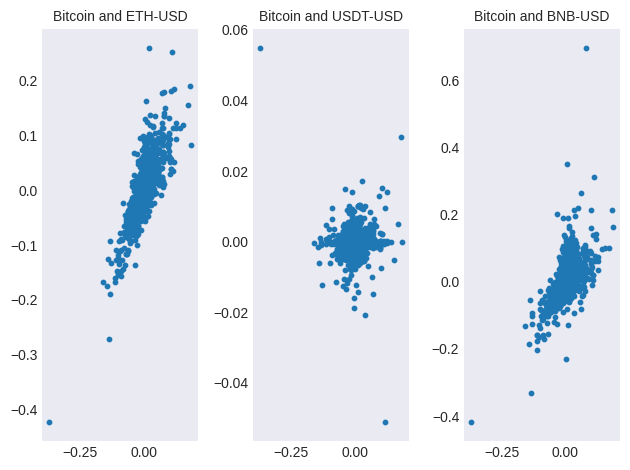

In [ ]:
#The scatter plots point at the existence of a linear relationship between Bitcoin and Ether.
f4, axp3 = plt.subplots(1,3)
ns=['BTC-USD']
ms=['ETH-USD','USDT-USD','BNB-USD']
i=0
for m in range(3):
    axp3[m].scatter(ddataset2[ns[0]],ddataset2[ms[i]],s=10)
    axp3[m].set_title('Bitcoin and {}'.format(ms[i]),size=10)
    i=i+1
plt.tight_layout()
plt.show()

# Skewness and Kurtosis

In [ ]:
#Skewness based on monthly mean data of percent returns
#sk1=scipy.stats.skew(datar_meanbtc, axis=0,bias=True)
#print (sk1)

In [ ]:
#kurtosis based on monthly mean data of percent returns
#ku1=scipy.stats.kurtosis(datar_meanbtc, axis=0, bias=True)
#print (ku1)

In [ ]:
#merging mean monthly data of returns
data_monmean=pd.concat([datar_meanbtc,datar_meaneth,datar_meanusdt,datar_meanbnb],axis=1,join='inner')
data_monmean.columns=['BTC-USD','ETH-USD','USDT-USD','BNB-USD']
data_monmean.head()

,BTC-USD,ETH-USD,USDT-USD,BNB-USD
Date,,,,
2019-01-31,-0.003197,-0.008022,-0.000385,0.002124
2019-02-28,0.004238,0.009962,0.000129,0.019148
2019-03-31,0.002098,0.001348,-0.000300,0.018145
2019-04-30,0.009478,0.005338,0.000191,0.008992
2019-05-31,0.016343,0.017629,-0.000073,0.014180


In [ ]:
#Skewness based on % monthly mean returns
skw_m1 = data_monmean.skew(axis=0)
print (skw_m1)

BTC-USD     0.009319
ETH-USD     0.061897
USDT-USD   -0.676967
BNB-USD     2.983495
dtype: float64


In [ ]:
#kurtosis based on % daily retruns
kurt_m1 = data_monmean.kurtosis(axis=0)
print (kurt_m1)

BTC-USD     -0.345892
ETH-USD     -0.456355
USDT-USD     4.334549
BNB-USD     14.410001
dtype: float64


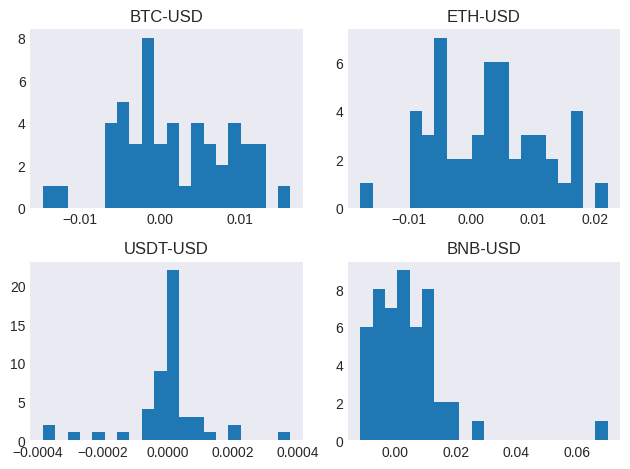

In [ ]:
#plottign distribution of montly mean data
ax3=data_monmean.hist(bins=20,grid=False)
plt.tight_layout()
plt.show()

In [ ]:
#Skewness based on % daily returns
skw = ddataset2.skew(axis=0)
print (skw)

BTC-USD    -0.436793
ETH-USD    -0.396065
USDT-USD    0.803538
BNB-USD     1.485433
dtype: float64


In [ ]:
#kurtosis based on % daily retruns
kurt = ddataset2.kurtosis(axis=0)
print (kurt)

BTC-USD      9.549125
ETH-USD      7.100910
USDT-USD    85.419119
BNB-USD     25.926057
dtype: float64


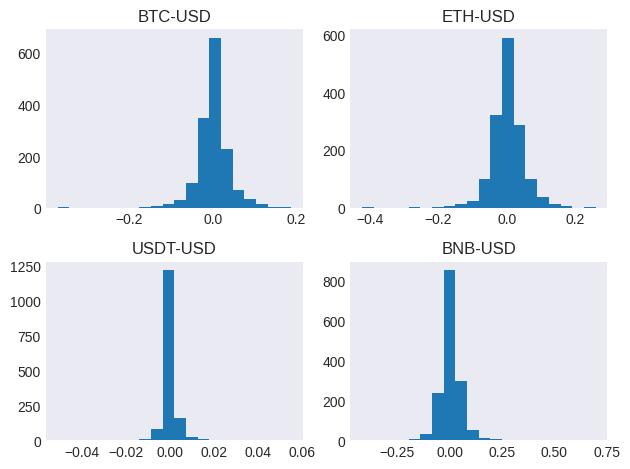

In [ ]:
#plottign distribution of daily return data
ax3=ddataset2.hist(bins=20,grid=False)
plt.tight_layout()
plt.show()

# METHOD 2

In [ ]:
!pip install PyPortfolioOpt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.9/61.9 kB 2.3 MB/s eta 0:00:00


In [ ]:
from pypfopt import EfficientFrontier,efficient_frontier
from pypfopt import discrete_allocation
#, risk_models, expected_returns, objective_functions, base_optimizer, base_optimization
from pypfopt import risk_models
from pypfopt import expected_returns

In [ ]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt.discrete_allocation import DiscreteAllocation
from pypfopt import risk_models
#from pypfopt import expected_return

In [211]:
#tickers of the stocks
tickers = ['NVDA', 'XOM', 'CAT', 'MRK']

# Download historical data from Yahoo Finance
data = yfin.download(tickers, start="2022-02-01", end="2024-02-01", interval="1d")['Adj Close']

[*********************100%%**********************]  4 of 4 completed


In [215]:
 # Calculate daily returns
 daily_returns = data.pct_change().dropna()

 # Calculate statistics
 average_return = daily_returns.mean() * 252  # Annualized
 volatility = daily_returns.std() * np.sqrt(252)  # Annualized
 skewness = daily_returns.skew()
 kurtosis_values = daily_returns.apply(kurtosis)

In [216]:
 # Correlation and Covariance matrices
 correlation_matrix = daily_returns.corr()
 covariance_matrix = daily_returns.cov() * 252  # Annualized

 # Create a DataFrame for statistics
statistics_df = pd.DataFrame({
                            "Average Return": average_return,
                            "Volatility": volatility,
                            "Skewness": skewness,
                            "Kurtosis": kurtosis_values
                            })


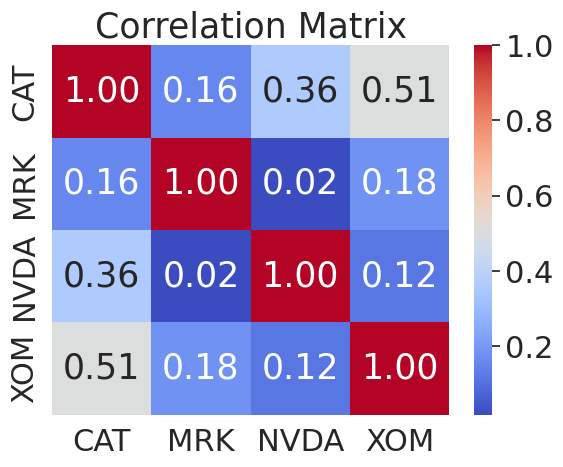

In [217]:
#correlation and covariance matrices
sns.set(font_scale=2)
sns.heatmap(correlation_matrix.rename_axis(index=None, columns=None), annot=True, cmap="coolwarm",
              fmt=".2f", annot_kws={'size':25})
plt.title('Correlation Matrix', fontsize=25)
plt.show()

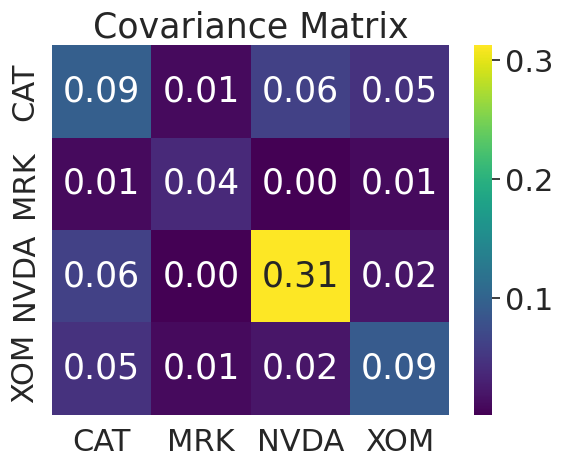

<Figure size 640x480 with 0 Axes>

In [218]:
 # Plotting the covariance matrix
 sns.heatmap(covariance_matrix.rename_axis(index=None, columns=None), annot=True, cmap="viridis",
            fmt=".2f", annot_kws={'size':25})
 plt.title('Covariance Matrix', fontsize=25)
 plt.show()

 plt.tight_layout()
 plt.show()

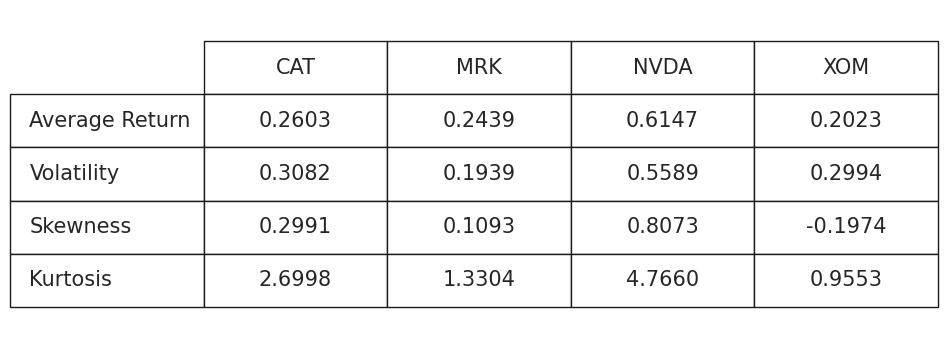

In [219]:
 transposed_df = statistics_df.T
 formatted_df = transposed_df.applymap(lambda x: f"{x:.4f}")

 # Create a figure for the table
 fig, ax = plt.subplots(figsize=(10, 4))  # Adjust size as needed
ax.axis('off')

# Adding the table to the plot
table = ax.table(cellText=formatted_df.values,
                 colLabels=formatted_df.columns,
                 rowLabels=formatted_df.index,
                 cellLoc='center',
                 loc='center')

table.auto_set_font_size(False)
table.set_fontsize(15)
table.scale(1, 3)

plt.tight_layout()
plt.show()

In [221]:
# ------------------- OPTIMIZATION --------------------------------------------------

# Expected returns and sample covariance
mu = expected_returns.mean_historical_return(data)
S = risk_models.sample_cov(data)

# Optimize for maximal Sharpe ratio
ef = EfficientFrontier(mu, S)
weights = ef.max_sharpe()
cleaned_weights = ef.clean_weights()
ef.portfolio_performance(verbose=True)

# Get the discrete allocation
latest_prices = data.iloc[-1]
da = DiscreteAllocation(weights, latest_prices, total_portfolio_value=10000)
allocation, leftover = da.lp_portfolio()
print(f"Discrete allocation: {allocation}")
print(f"Funds remaining: ${leftover:.2f}")

Expected annual return: 31.4%
Annual volatility: 18.7%
Sharpe Ratio: 1.57
Discrete allocation: {'CAT': 2, 'MRK': 58, 'NVDA': 32, 'XOM': 5}
Funds remaining: $8.05


In [223]:
# Apply optimized weights
optimized_weights = np.array(list(cleaned_weights.values()))
optimized_portfolio_returns = (data.pct_change().dropna() @ optimized_weights)

# Calculate statistics for the optimized portfolio
optimized_stats = {
    "Average Return": np.mean(optimized_portfolio_returns) * 252,
    "Volatility": np.std(optimized_portfolio_returns) * np.sqrt(252),
    "Skewness": skew(optimized_portfolio_returns),
    "Kurtosis": kurtosis(optimized_portfolio_returns),
 }

In [224]:
 optimized_stats_df = pd.DataFrame(optimized_stats, index=["Optimized Portfolio"])
 transposed_optimized_df = optimized_stats_df.T


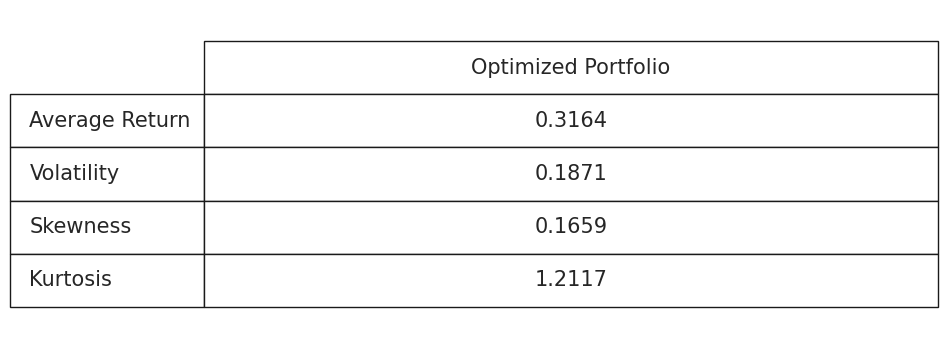

[0.04948 0.70179 0.19885 0.04989]


In [225]:
formatted_df = transposed_optimized_df.applymap(lambda x: f"{x:.4f}")

# Create a figure for the table
fig, ax = plt.subplots(figsize=(10, 4))  # Adjust size as needed
ax.axis('off')

# Adding the table to the plot
table = ax.table(cellText=formatted_df.values,
                 colLabels=formatted_df.columns,
                 rowLabels=formatted_df.index,
                 cellLoc='center',
                 loc='center')

table.auto_set_font_size(False)
table.set_fontsize(15)  # Adjust as needed
table.scale(1, 3)  # Adjust scale factor as needed

plt.tight_layout()
plt.show()

print(optimized_weights)

Thanks,
Vikas
EOF.